In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("/content/forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [21]:
data.shape

(517, 31)

In [22]:
#Converting dataframe to numpy as its a complex dataset
df = pd.DataFrame(data)
df.columns
print(df.to_numpy())


[['mar' 'fri' 86.2 ... 0 0 'small']
 ['oct' 'tue' 90.6 ... 1 0 'small']
 ['oct' 'sat' 90.6 ... 1 0 'small']
 ...
 ['aug' 'sun' 81.6 ... 0 0 'large']
 ['aug' 'sat' 94.4 ... 0 0 'small']
 ['nov' 'tue' 79.5 ... 0 0 'small']]


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [24]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [27]:
# Dropping columns which are not required

df = df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [28]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


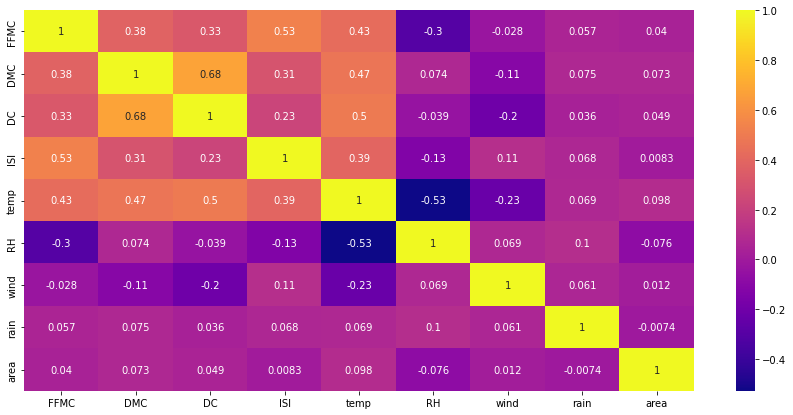

In [30]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In Above Heatmap found the maximum correlation between ISI And FFMC

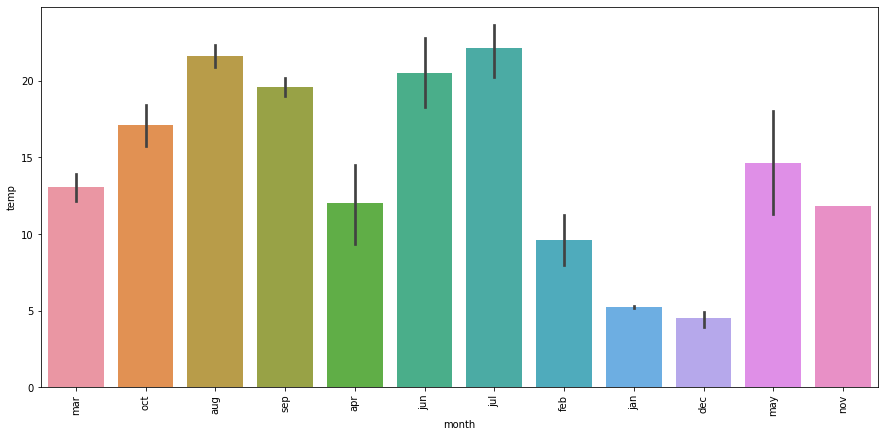

In [31]:
#Plotting a barplot between temprature & month
plt.figure(figsize=(15,7))
sns.barplot(x = df['month'],y = df['temp'])
plt.xticks(rotation = 'vertical')
plt.show()

In [32]:
# Checking how much datapoints are having small and large area
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

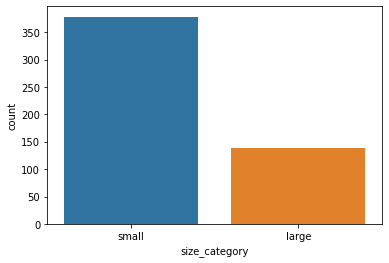

In [33]:
#plotting Graph of small & large
sns.countplot(x = 'size_category', data = data)

In [34]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(df.area, df.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


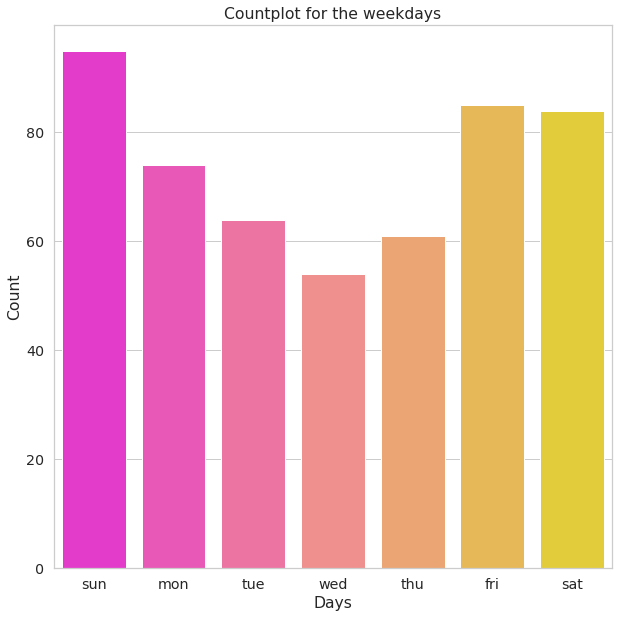

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

In [38]:
#Using Onehotencoder
!pip install --upgrade category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 904 kB/s 


In [39]:
encoder = ce.OneHotEncoder(cols=['month', 'day'])

In [40]:
df1 = encoder.fit_transform(df)

In [41]:
df1.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,1,0,0,0,0,0,0,0,0,0,...,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,0,1,0,0,0,0,0,0,0,0,...,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,0,1,0,0,0,0,0,0,0,0,...,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,1,0,0,0,0,0,0,0,0,0,...,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,1,0,0,0,0,0,0,0,0,0,...,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [42]:
y=df1['size_category']
X=df1.drop(['size_category'],axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
y=le.fit_transform(y)

In [45]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 28)
Shape of x_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


#Building SVM model

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [95]:
# Feature Scaling
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# make predictions
prediction = svm.predict(X_test)
 
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test_std)

print(metrics.classification_report(y_test, prediction))
print("Accuracy of model using SVC:",accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.39      0.55        46
           1       0.79      0.98      0.88       110

    accuracy                           0.81       156
   macro avg       0.85      0.69      0.71       156
weighted avg       0.83      0.81      0.78       156

Accuracy of model using SVC: 0.8397435897435898
Precision: 0.7941176470588235
Recall: 0.9818181818181818


In [60]:
y_pred = svm.predict(X_test)

In [61]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': svm.predict(X)})

In [62]:
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
512,0,1
513,0,0
514,0,1
515,1,1


In [63]:
y_pred_train = svm.predict(X_train)

y_pred_train

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

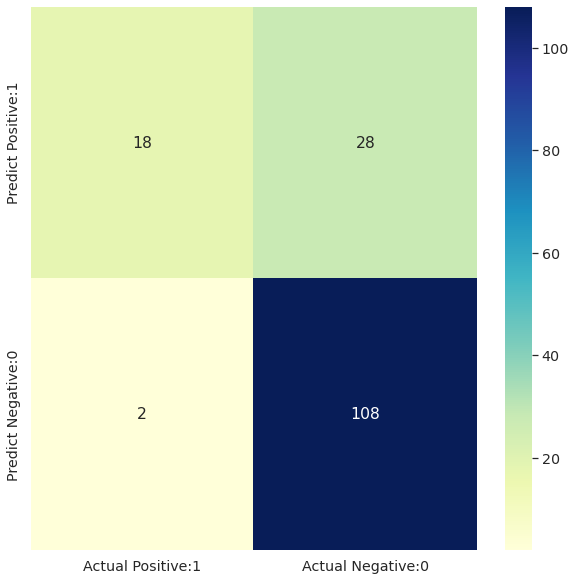

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [67]:
yhat = svm.predict(X_test)

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, yhat)

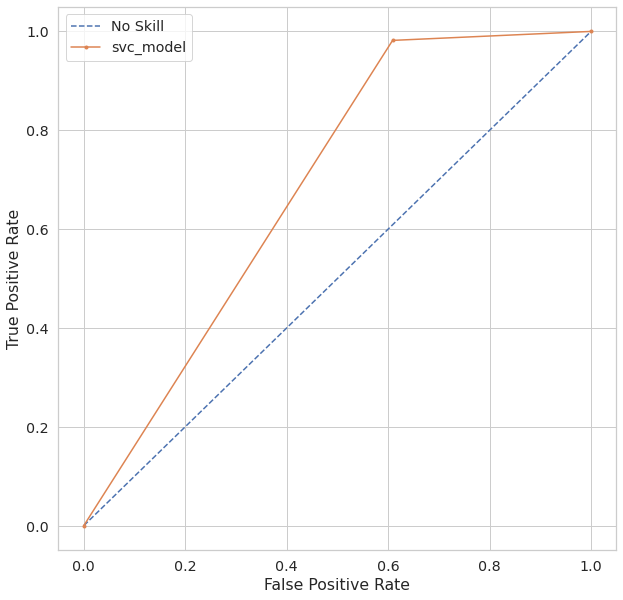

In [69]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='svc_model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#Building SVM model with Hyper Parameters

In [72]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [96]:
model.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy of model Hyper Parameter :",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.35      0.50      0.41       156
weighted avg       0.50      0.71      0.58       156

[[  0  46]
 [  0 110]]
Accuracy of model Hyper Parameter : 0.7051282051282052
Precision: 0.7051282051282052
Recall: 1.0


#Building model with Grid Search CV

In [78]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [79]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 50, 'kernel': 'linear'}, 0.986111111111111)

#Building: final SVM model with 'C': 15, 'gamma': 50, 'kernel': 'linear'

In [97]:
final_model = SVC(C= 15, gamma = 50, kernel = 'linear')

In [98]:
final_model.fit(X_train, y_train)
# make predictions
prediction = final_model.predict(X_test)
# summarize the fit of the final_model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       1.00      0.98      0.99       110

    accuracy                           0.99       156
   macro avg       0.98      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156

[[ 46   0]
 [  2 108]]
Accuracy: 0.9871794871794872
Precision: 1.0
Recall: 0.9818181818181818


In [99]:
final_model = SVC(C= 15, gamma = 50, kernel = 'rbf')

In [100]:
final_model.fit(X_train, y_train)
# make predictions
prediction = final_model.predict(X_test)
# summarize the fit of the final_model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.35      0.50      0.41       156
weighted avg       0.50      0.71      0.58       156

[[  0  46]
 [  0 110]]
Accuracy: 0.7051282051282052
Precision: 0.7051282051282052
Recall: 1.0


#Model Prediction

In [84]:
predicted = []
testtrain = np.array(X_train)
for i in range(len(testtrain)):
    predicted.append(svm.predict([testtrain[i]]))

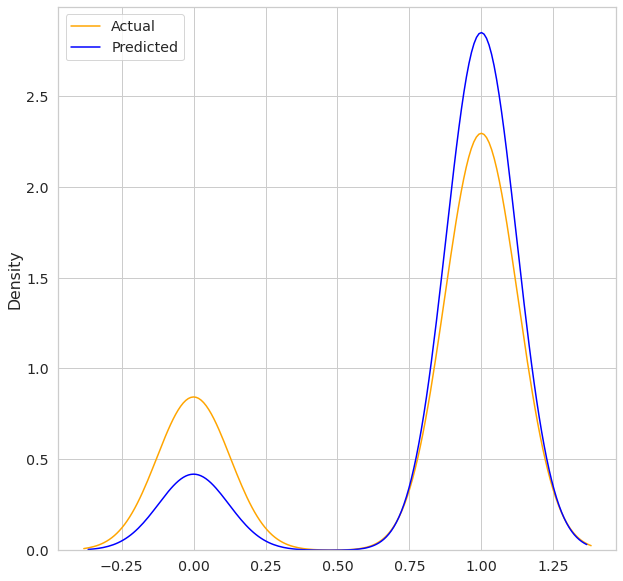

In [86]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [88]:
predicted = []
testtrain = np.array(X)
for i in range(len(testtrain)):
    predicted.append(svm.predict([testtrain[i]]))

In [89]:
y_pred = svm.predict(X)

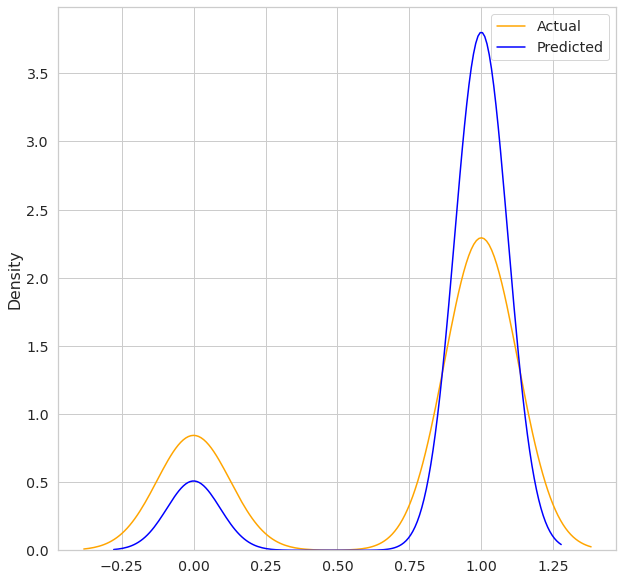

In [90]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [91]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [92]:
data = df.copy()
data['Predicted area'] = np.array(ans)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,Predicted area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,2.718282
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,2.718282
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,2.718282
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,2.718282
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,2.718282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,2.718282
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1.000000
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,2.718282
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,2.718282


#Actual data

(-1.115898643281713,
 1.1007570782515101,
 -1.111058178370681,
 1.1190141830134557)

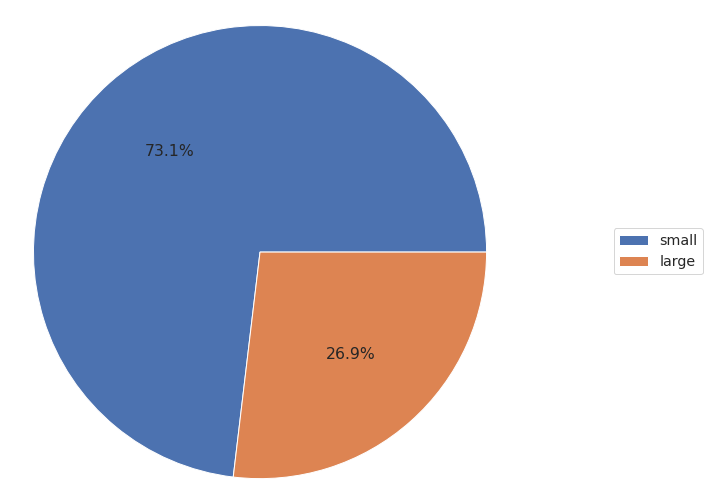

In [93]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["size_category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

#Predicted Data

(-1.102643507559752,
 1.100125881312369,
 -1.1070465996645944,
 1.1062235012304953)

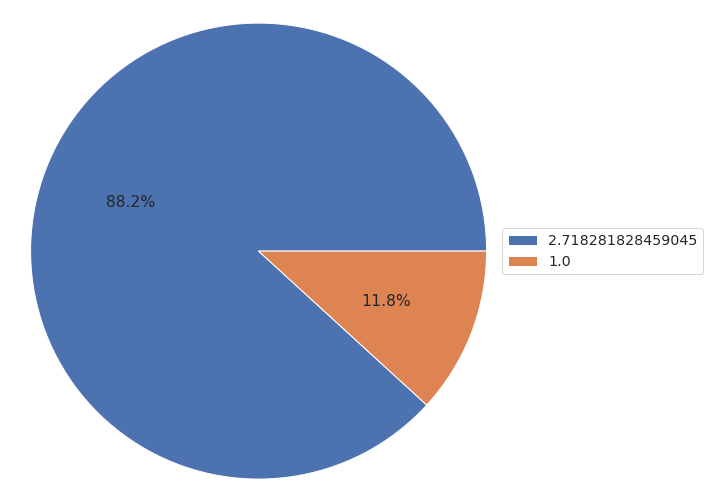

In [94]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = data["Predicted area"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")

#Conclusion

Accuracy of model using SVC: 0.8397435897435898                            
Precision: 0.7941176470588235                                              
Recall: 0.9818181818181818                                                 
**SVM model with Hyper Parameters**                                        
Accuracy of model Hyper Parameter : 0.7051282051282052                     
Precision: 0.7051282051282052                                              
Recall: 1.0                                                       
**model with Grid Search CV ** =0.986111111111111  






**model with 'C': 15, 'gamma': 50, 'kernel': 'linear'**  
Accuracy: 0.9871794871794872                                               
Precision: 1.0                                                             
Recall: 0.9818181818181818    
**model with 'C': 15, 'gamma': 50, 'kernel': 'rbf'**
Accuracy: 0.7051282051282052                                               
Precision: 0.7051282051282052                                              
Recall: 1.0